# An End-to-End Text Classification System

In this workshop you will implement a text classification system from scratch. This means that we will not rely on Keras' convenient data sets. These data sets are pre-processed and it will be useful if you know how to tokenise and find the word indices of text collections not provided by Keras.

The task will be to classify questions. NLTK has a corpus of questions and their question types according to a particular classification scheme (e.g. DESC refers to a question expecting a descriptive answer, such as one starting with "How"; HUM refers to a question expecting an answer referring to a human). Here's some example of use of the corpus:

In [2]:
import nltk
nltk.download("qc")
from nltk.corpus import qc
train = qc.tuples("train.txt")
test = qc.tuples("test.txt")

[nltk_data] Downloading package qc to /root/nltk_data...
[nltk_data]   Unzipping corpora/qc.zip.


In [3]:
train[:3]

[('DESC:manner', 'How did serfdom develop in and then leave Russia ?'),
 ('ENTY:cremat', 'What films featured the character Popeye Doyle ?'),
 ('DESC:manner', "How can I find a list of celebrities ' real names ?")]

In [4]:
test[:3]

[('NUM:dist', 'How far is it from Denver to Aspen ?'),
 ('LOC:city', 'What county is Modesto , California in ?'),
 ('HUM:desc', 'Who was Galileo ?')]

### Exercise: Find all question types
Write Python code that lists all the possible question types of the training set (**remember: never look at the test set**).


### Exercise: Find all general types

The question types have two parts. The first part describes a general type, and the second part defines a subtype. For example, the question type `DESC:manner` belongs to the general `DESC` type and within that type to the `manner` subtype. Let's focus on the general types only. Write Python code that lists all the possible general types (there are 6 of them).

### Exercise: Partition the data
There is a train and test data, but for this exercise we want to have a partition into train, dev-test, and test. In this exercise, combine all data into one array and do a 3-way partition into train, dev-test, and test. Make sure that you shuffle the data prior to doing the partition. Also, make sure that you only use the general label types.

In [10]:
q_train = ...
q_devtest = ...
q_test = ...

### Exercise: Tokenise the data

Use Keras' tokeniser to tokenise all the data. For this exercise we will use only the 100 most frequent words in the training set (since you aren't supposed to use the dev-test or test sets to extract features).

In [13]:
max_words = 100
indices_train = ...
indices_devtest = ...
indices_test = ...

### Exercise: Vectorize the data
The following code shows the distribution of lengths of the training data:

(array([  43., 1001., 1327.,  815.,  169.,  162.,   43.,    7.,    2.,
           2.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

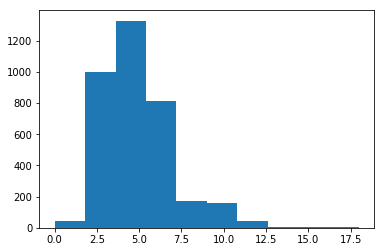

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.hist([len(d) for d in indices_train])

The histogram shows that the longest question in the training data has 18 word indices, but by far most of the questions have at least 10. Based on this, use Keras' `pad_sequences` to vectorize the questions into sequences of 10 word indices. The default will be to truncate the beginning, but we want to truncate the end (since the first words of a question are often very important to determine the question type). For this you can use the option `truncating='post'`: https://keras.io/preprocessing/sequence/

In [15]:
maxlen = 10
x_train = ...
x_devtest = ...
x_test = ...

### Exercise: Vectorise the labels
Convert the labels to one-hot encoding. If you use Keras' `to_categorical` you would first need to convert the labels to integers.

In [24]:
y_train = ...
y_devtest = ...
y_test = ...

### Exercise: Define the model

Define a model for classification. For this model, use a feedforward architecture with an embedding layer of size 20, a layer that computes the average of word embeddings (use `GlobalAveragePooling1D`), a hidden layer of 16 units, and `relu` activation. You need to determine the size and activation of the output layer.

In [ ]:
embedding_dim = 20


### Exercise: Train and evaluate
Train your model. In the process you need to determine the optimal number of epochs. Then answer the following questions:
1. What was the optimal number of epochs and how did you determine this?
2. Is the system overfitting? Justify your answer.

### Optional Exercise: Data exploration
Plot the distribution of labels in the training data and compare with the distribution of labels in the devtest data. Plot also the distribution of predictions in the devtest data. What can you learn from this?

### Optional Exercise: Improve your system

Try the following options:
1. Use pre-trained word embeddings
2. Use recurrent neural networks.

Feel free to try each option separately and in combination, and compare the results. Feel also free to try with other variants of the initial architecture, such as:
1. Introducing more hidden layers.
2. Changing the size of embeddings.
3. Changing the number of units in the hidden layer(s).